### Lab Machine Learning, part one: Heart disease prediction.
[Link Kaggle dataset](https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset)  
About the dataset:  
Features:  
- Age | Objective Feature | age | int (days)
- Height | Objective Feature | height | int (cm) |
- Weight | Objective Feature | weight | float (kg) |
- Gender | Objective Feature | gender | categorical code | 1 = woman, 2 = man
- Systolic blood pressure | Examination Feature | ap_hi | int |
- Diastolic blood pressure | Examination Feature | ap_lo | int |
- Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
- Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
- Smoking | Subjective Feature | smoke | binary |
- Alcohol intake | Subjective Feature | alco | binary |
- Physical activity | Subjective Feature | active | binary |
- Presence or absence of cardiovascular disease | Target Variable | cardio | binary |
- All of the dataset values were collected at the moment of medical examination.

Purpose:
- Find the most important risk factors for cardiovascular disease. This means that "cardio" is the response variable and the other ones are explanatory variables.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_orig = pd.read_csv('../data/cardio_train.csv', delimiter=";")

#### EDA

In [3]:
df_orig.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


Examining the data, there is obviously some unrealistic data within it.
- Blood pressure: quite a lot of blood pressure metrics are unrealistic. Google search results in some knowledge on what values that are realistic to expect [Link to heart.org](https://www.heart.org/en/health-topics/high-blood-pressure/understanding-blood-pressure-readings)
- Weight: there is some unrealistically low wight observations. Hard to draw a line but questimation is that values below 40kg can be removed.
- Height: mesures below 120cm and above 220cm removed. Obviously it's possible to be both taller and smaller, but this seems reasonable.

In [4]:
# extracting "valid" data, based on above:
df = df_orig[(df_orig['ap_lo'] < 200) & (df_orig['ap_lo'] > 40) & (df_orig['ap_hi'] > 50) & (df_orig['ap_hi'] < 220) & (df_orig['weight'] > 40) & (df_orig['height'] > 120) & (df_orig['height'] < 220)]
print(f'Filtering removed {len(df_orig)-len(df)} instances of the sampled data')

Filtering removed 1442 instances of the sampled data


1a: Number of individuals with presence and absence of cardiovascular disease.

In [5]:
cardio = df['cardio'].value_counts()
print(f'Nbr of individuels with absence of cardiovascular disease: {cardio.loc[0]}')
print(f'Nbr of individuels with presence of cardiovascular disease: {cardio.loc[1]}')

Nbr of individuels with absence of cardiovascular disease: 34620
Nbr of individuels with presence of cardiovascular disease: 33938


1b: Ratio of individuals with normal, above normal and well above normal cholesterol levels.

In [6]:
cholesterol_ratio = df['cholesterol'].value_counts()
cholesterol_ratio = cholesterol_ratio.to_frame()
cholesterol_ratio['cholesterol_ratio'] = cholesterol_ratio['count'] / cholesterol_ratio['count'].sum()
print(f'Ratio of individuals with "normal" cholesterol levels: {cholesterol_ratio.iloc[0,1]:.1%} percent')
print(f'Ratio of individuals with "above normal" cholesterol levels: {cholesterol_ratio.iloc[1,1]:.1%} percent')
print(f'Ratio of individuals with "well above normal" cholesterol levels: {cholesterol_ratio.iloc[2,1]:.1%} percent')


Ratio of individuals with "normal" cholesterol levels: 75.0% percent
Ratio of individuals with "above normal" cholesterol levels: 13.5% percent
Ratio of individuals with "well above normal" cholesterol levels: 11.5% percent


1c: Age distribution:

C:\Users\danie\AppData\Local\Temp\ipykernel_11184\2279038683.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age_yrs'] = round(df['age']/365, 3)


Age Data [years]: Mean=53.3, Stdev=6.8, Min=29.6, Max=65.0 


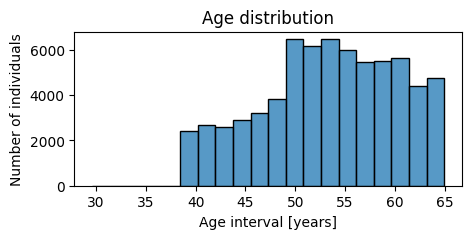

In [7]:
df['age_yrs'] = round(df['age']/365, 3)
fig, ax = plt.subplots(figsize=(5, 2))
sns.histplot(data = df, x='age_yrs', bins=20), plt.title('Age distribution'), plt.ylabel('Number of individuals'), plt.xlabel('Age interval [years]')
print(f"Age Data [years]: Mean={df['age_yrs'].mean():.1f}, Stdev={df['age_yrs'].std():.1f}, Min={df['age_yrs'].min():.1f}, Max={df['age_yrs'].max():.1f} ")

1d: Ratio of smokers

In [8]:
ratio_smokers = df['smoke'][df['smoke'] == 1].sum() / len(df['smoke'])
print(f"Ratio of individuals that smoke: {ratio_smokers:.2%}")


Ratio of individuals that smoke: 8.81%


1e: Weight distribution.

Weight Data [kg]: Mean=74.16, Stdev=14.24, Min=41.00, Max=200.00 


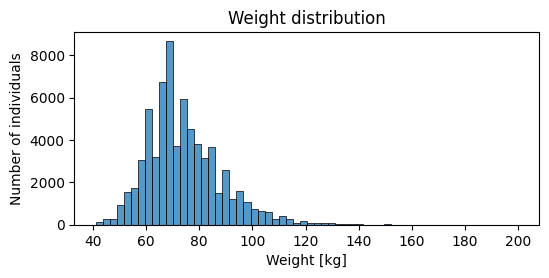

In [9]:
fig, ax = plt.subplots(figsize=(6, 2.5))
sns.histplot(data=df, x='weight', bins=60), plt.title('Weight distribution'), plt.xlabel('Weight [kg]'), plt.ylabel('Number of individuals')
print(f"Weight Data [kg]: Mean={df['weight'].mean():.2f}, Stdev={df['weight'].std():.2f}, Min={df['weight'].min():.2f}, Max={df['weight'].max():.2f} ")

1f, length distribution:

Height Data [cm]: Mean=164.45, Stdev=7.84, Min=122.00, Max=207.00 


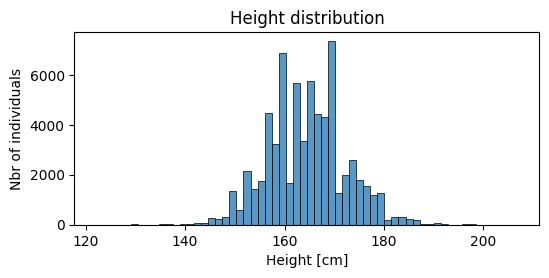

In [10]:
fig, ax = plt.subplots(figsize=(6, 2.5))
sns.histplot(data=df, x='height', bins=60)
plt.title('Height distribution'), plt.xlabel('Height [cm]'), plt.ylabel('Nbr of individuals')
print(f"Height Data [cm]: Mean={df['height'].mean():.2f}, Stdev={df['height'].std():.2f}, Min={df['height'].min():.2f}, Max={df['height'].max():.2f} ")

1g: Ratio of cardivascular disease among men and women.

In [11]:
cardio_women = len(df[(df['gender'] == 1) & (df['cardio'] == 1)]) / len(df[(df['gender'] == 1)])
cardio_men = len(df[(df['gender'] == 2) & (df['cardio'] == 1)]) / len(df[(df['gender'] == 2)])
print(f'Cardiovascular disease among women = {cardio_women:.1%}, cardiovascular disease among men={cardio_men:.1%}')

Cardiovascular disease among women = 49.3%, cardiovascular disease among men=50.0%


C:\Users\danie\AppData\Local\Temp\ipykernel_11184\3591199371.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['age_yrs'], inplace=True)


<Axes: >

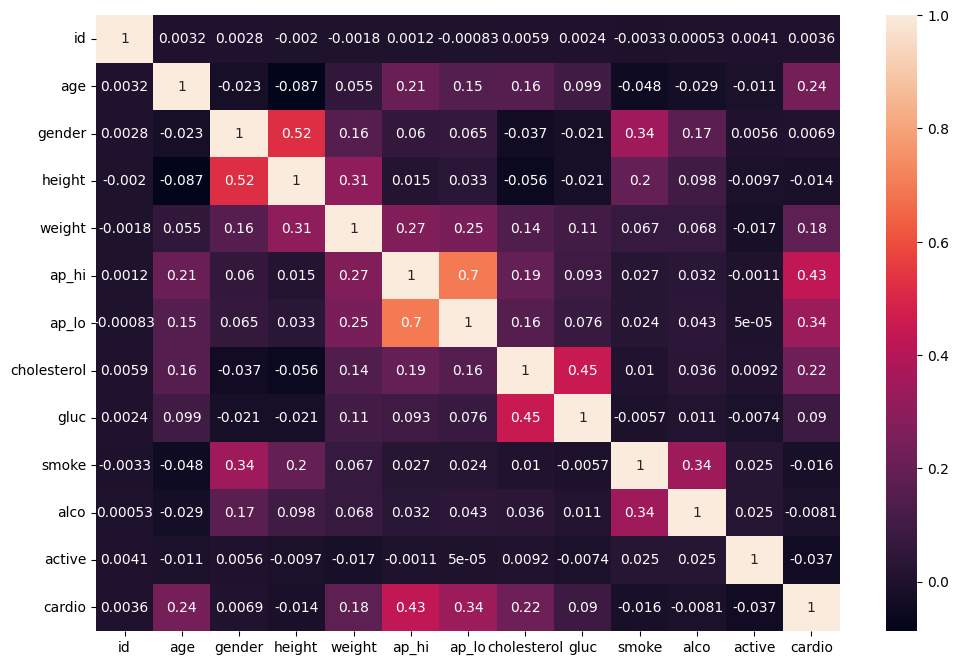

In [42]:
df.drop(columns=['age_yrs'], inplace=True)
df_corr = df.corr()
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(df_corr, annot=True)

In [43]:
# Listing top correlations between 'cardio' and the other features, in descending order.
a_corr = df_corr['cardio'].abs().sort_values(ascending=False)
print(a_corr[1:7])

ap_hi          0.426780
ap_lo          0.336083
age            0.239365
cholesterol    0.221351
weight         0.179801
gluc           0.089935
Name: cardio, dtype: float64


#### Summary of findings in EDA and correlation analysis:
- Original data deemed unrealistic has been removed. The removal of data has been done based on information found on internet (for blood pressure) and based on own experience (for weight and height).
- Based on the correlation analysis, high blood pressure (ap_hi and ap_low) have the strongest correlation with 'cardio'.
- In descending order, these are the main risk factors for cardiovascular disease: age, cholesterol, weight, glucose.
- ap_hi and ap_lo is very much correlated (as expected)
- Height and gender is much correlated.
- Smoking and gender is also quite much correlated.
- High glucose is not so correlated with cardio, but it is very mych correlated with cholesterol. Cholesterol in turn is relatively higly correlated with cardio.
- 
